<div style="background-color: #215880; padding: 10px; border-radius: 5px;">
    <h3 style="color: #e6f1fa; font-size: 30px; font-weight: bold; margin: 10px;">DATA DESCRIPTION</h3>
</div>

The following features are contained within the ```historical.csv```. The dataset has a shape of 2,100 rows and 25 columns:


<div align="center">

| **Feature Name**              | **Feature Description**                            | **Data Type** |
| :----------------------------: | :------------------------------------------------: | :------------: |
| `baby_id`                     | Unique identifier for each baby                    | string        |
| `name`                        | Name of the baby                                   | string        |
| `gender`                      | Gender of the baby (Male/Female)                   | string        |
| `gestational_age_weeks`       | Gestational age at birth (normal: 37–42 weeks)     | float         |
| `birth_weight_kg`             | Weight of the baby at birth (normal: 2.5–4.5 kg)   | float         |
| `birth_length_cm`             | Length of the baby at birth (average: 48–52 cm)    | float         |
| `birth_head_circumference_cm` | Head circumference at birth (average: 33–35 cm)    | float         |
| `date`                        | Monitoring date                                    | string (date) |
| `age_days`                    | Age of the baby in days since birth                | integer       |
| `weight_kg`                   | Recorded daily weight                              | float         |
| `length_cm`                   | Recorded daily body length                         | float         |
| `head_circumference_cm`       | Recorded daily head circumference                  | float         |
| `temperature_c`               | Body temperature in °C (normal: 36.5–37.5)         | float         |
| `heart_rate_bpm`              | Heart rate (normal: 120–160 bpm)                   | integer       |
| `respiratory_rate_bpm`        | Respiratory rate (normal: 30–60 bpm)               | integer       |
| `oxygen_saturation`           | Oxygen saturation level (normal >95%)              | integer       |
| `feeding_type`                | Type of feeding: Breastfeeding, Formula, or Mixed  | string        |
| `feeding_frequency_per_day`   | Number of feeds per day (normal: 8–12)             | integer       |
| `urine_output_count`          | Wet diaper count per day (normal: 6–8+)            | integer       |
| `stool_count`                 | Bowel movements per day (0–5 typical)              | integer       |
| `jaundice_level_mg_dl`        | Bilirubin level (normal <5, mild 5–12, severe >15) | float         |
| `apgar_score`                 | APGAR score at birth (0–10, recorded on day 1)     | float         |
| `immunizations_done`          | Immunizations completed (Yes/No)                   | string        |
| `reflexes_normal`             | Whether newborn reflexes are normal (Yes/No)       | string        |
| `risk_level`                  | Target variable: Healthy (0) or At Risk (1)        | string        |

</div>


With the `risk_level` being the target feature for the model.

<div style="background-color: #215880; padding: 10px; border-radius: 5px;">
    <h3 style="color: #e6f1fa; font-size: 30px; font-weight: bold; margin: 10px;">EXPLORATORY DATA ANALYSIS</h3>
</div>

This section explores the Baby Monitor dataset to understand its structure and key characteristics before model evaluation. The analysis focuses on identifying trends, distributions, and anomalies in newborn health metrics, as well as checking for missing data or imbalances that could affect model performance.

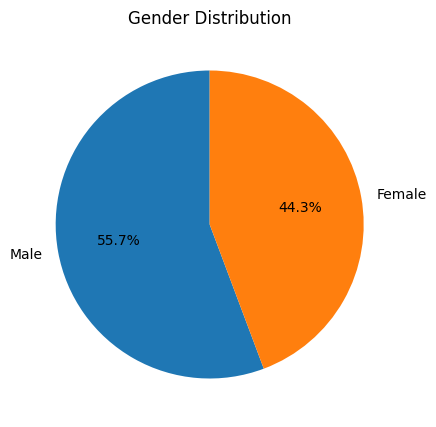

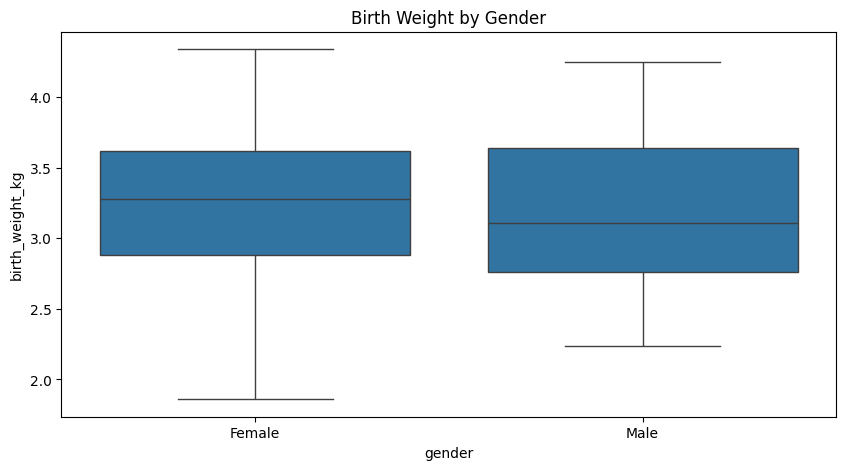

In [25]:
# Gender distribution
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='birth_weight_kg', data=data)
plt.title("Birth Weight by Gender")
plt.show()

### **Gender Distribution (Pie Chart)**

This chart shows the percentage of males and females the dataset. It indicates that the sample distribution is 55.7% males and 44.3% females.

***

### **Birth Weight by Gender (Box Plot)**

This chart compares the distribution of birth weights between male and female infants. It shows that both genders have a very similar median birth weight which is around 3.2 kg. The overall spread of the birth weights is also very comparable for both groups, suggesting that there isn't a significant difference in birth weight between males and females in the data.

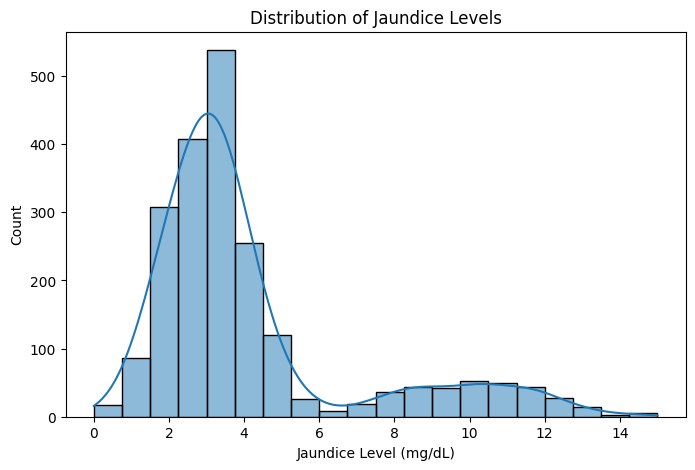

In [24]:
# Distribution of jaundice levels
plt.figure(figsize=(8,5))
sns.histplot(data['jaundice_level_mg_dl'], bins=20, kde=True)
plt.title("Distribution of Jaundice Levels")
plt.xlabel("Jaundice Level (mg/dL)")
plt.show()


### **Distribution of Jaundice Levels (Histogram)** 
The distribution of jaundice levels using a histogram reveals a bimodal pattern. The primary and larger peak indicates that a majority of the subjects have jaundice levels concentrated around 3-4 mg/dL. A second, smaller peak is also evident in the 9-11 mg/dL range, representing a smaller but significant subgroup with elevated levels. The overall distribution is skewed to the right, which points to the presence of a minority of individuals with exceptionally high jaundice levels.

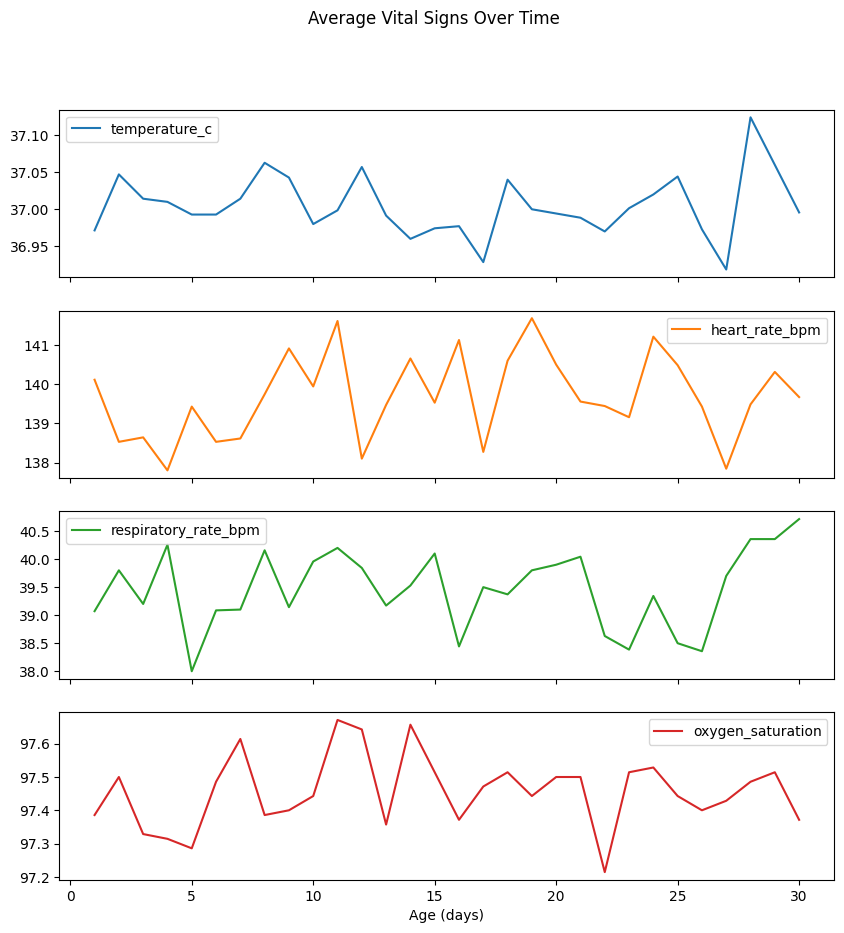

In [28]:
# Average vital signs per age day
vital_cols = ['temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation']
vital_trends = data.groupby('age_days')[vital_cols].mean()

vital_trends.plot(subplots=True, figsize=(10,10), title="Average Vital Signs Over Time")
plt.xlabel("Age (days)")
plt.show()


### **Average Vital Signs Over Time (Line Graphs)** 

The line graphs displays the average daily trends for four vital signs—temperature, heart rate, respiratory rate, and oxygen saturation—over a 30-day period. All four metrics exhibit daily fluctuations without a long-term upward or downward trend. While temperature remains relatively stable, both heart rate and respiratory rate show more pronounced day-to-day variability. Oxygen saturation also fluctuates daily but stays within a consistent range. Overall, the graph indicates that despite short-term variations, the vital signs stayed generally steady throughout the entire month.